#### Title: 
Sprint 13 Project
Time Series 

#### Summary

   This project involves the use of Time Series.  In this project, I will try to train various models in order to make predictions for the Sweet Lift Taxi Company. The models that I have chosen to use are: Linear Regression, Random Forest Regressor, Light GBM, Autoregression (AR), Moving Average (MA), ARMA and SARIMAX.  This project also includes an EDA section that consists of a histogram chart that displays the distribution of the number of orders for the Sweet Lift Taxi company, and decomposed charts that shows information about: the trend, seasonality and residuals.

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

## Preparation

In [116]:
#Import the necessary libraries.
import pandas as pd 

from sklearn.model_selection import train_test_split 

import seaborn as sns 

import matplotlib.pyplot as plt 

from statsmodels.tsa.seasonal import seasonal_decompose, STL

from statsmodels.tsa.stattools import adfuller, arma_order_select_ic

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import numpy as np 

from sklearn.metrics import mean_squared_error, make_scorer 

from sklearn.linear_model import LinearRegression 

from statsmodels.tsa.arima.model import ARIMA  

from pmdarima import auto_arima 

from statsmodels.tsa.statespace.sarimax import SARIMAX 

from sklearn.ensemble import RandomForestRegressor 

from sklearn.model_selection import GridSearchCV  
 
from statsmodels.tsa.ar_model import AutoReg, ar_select_order 

import matplotlib.dates as mdates 

from sklearn.preprocessing import StandardScaler 

from lightgbm import LGBMRegressor

In [117]:
#Use a try and except clause in order to use the pd.read_csv() function on a local and non local computer.
#Use the index_col() method in order to make the first column the index of the dataframe and the parse_dates() 
#method in order to parse the dates of the first column of the dataset.
try:
    data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
except:
    data = pd.read_csv('taxi.csv', index_col=[0], parse_dates=[0])

In [118]:
#Use the sort_index() method in order to sort the dataframe's index.
data.sort_index(inplace=True) 

In [119]:
#Use the is_monotonic_increasing() method in order to verify if the index is sorted in
#increasing order.
try:
    print(data.index.is_monotonic_increasing)
except:
    print(data.index.is_monotonic)

True


In [120]:
#Use the is_monotonic_increasing() method in order to verify if the index is sorted in
#decreasing order.
try:
    print(data.index.is_monotonic_decreasing) 
except:
    print(data.index_is_monotonic)

False


Note To Reviewer:
The index_is_monotonic() method returns an error when I try to run the code in my computer.  So, I decided to you a
try and except clause in case the is_monotonic_increasing() and is_monotonic_decreasing() methods do not work on your
computer as well.  My apologies for the inconvenience.

Code Result:
The result of the is_monotonic_increasing() method came out as "True", which would indicate that the index is sorted in increasing order.
The result of the is_monotonic_decreasing() method came out as "False", which would indicate that the index is not sorted in decreasing
order.  According to the results, the index of the data is sorted appropriately for the task (increasing/ascending order).

In [121]:
#Remove all first duplicate value occurences before resampling.
print(data.index.duplicated().sum()) 

data = data[~data.index.duplicated(keep='first')] 

#Use the resample() and sum methods in order to resample the data in a way that
#displays the total sum per hour of num_orders.
data = data.resample('1H').sum()

0


In [122]:
#Use the head() method in order to check the first five rows of the dataframe.
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


Code Result:
It appears that the dataframe was created successfully with parsed dates and index.

In [123]:
#Use the isna() and sum() methods in order to check the dataframe for missing values.
data.isna().sum()

num_orders    0
dtype: int64

Code Result:
There are no missing values noted in the dataframe.

In [124]:
#Use the duplicated() and sum() methods in order to count the number of duplicate values in the
#dataframe.
data.duplicated().sum() 

4165

Code Result:
There are 4,165 duplicate values noted in the dataframe.

In [125]:
#Use the drop_duplicates() method in order to drop duplicate values from the dataframe.
data = data.drop_duplicates() 

In [126]:
#Use the duplicated() and sum() methods in order to double check the dataframe for duplicate values.
data.duplicated().sum()

0

Code Result:
There are no longer any duplicate values noted in the dataframe.  The duplicate values were successfully removed.

In [127]:
#Use the info() method in order to check the data types in the dataframe.
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-03-01 00:00:00 to 2018-08-31 18:00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  251 non-null    int64
dtypes: int64(1)
memory usage: 3.9 KB


Code Result:
It appears that the num_orders column of the dataframe has the appropriate data type (int64).

In [128]:
#Use the describe() method in order to check the min and max values of the dataframe.
data.describe()

,num_orders
count,251.000000
mean,130.023904
std,83.203746
min,0.000000
25%,62.500000
50%,125.000000
75%,188.500000
max,462.000000


Code Result:
It appears that there are 0 values in the dataframe.  These values will be removed in the cell below.

In [129]:
#Use conditional filtering in order to remove the 0 values in the num_orders column of the  data dataframe.
data = data[data['num_orders'] > 0] 

#Use the describe method again in order to double check the min and max values of the dataframe.
data.describe()

,num_orders
count,250.000000
mean,130.544000
std,82.960822
min,1.000000
25%,63.250000
50%,125.500000
75%,188.750000
max,462.000000


Code Result:
There are no longer any 0 values noted in the dataframe.  The 0 values were successfully removed.

## Analysis

#### Number of Orders Histogram

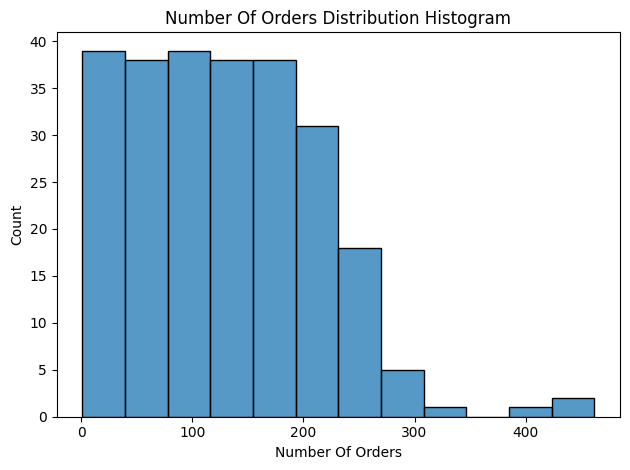

In [130]:
#Use the sns.histplot() function in order to create a histogram of the distribution of the num_orders column of the
#data dataframe.
sns.histplot(data['num_orders']) 

plt.title('Number Of Orders Distribution Histogram')
plt.xlabel('Number Of Orders') 
plt.tight_layout()

Observation: 
According to the histogram, the number of orders quantity with the highest count is: approximately 1-40 orders with the a count of:
approximately 38.  The number of orders quantity with the lowest count is: approximately 380-430 orders with the a count of:
approximately 2.  

#### Calculating Rolling Mean And Rolling STD

In [131]:
#Use the rolling(), mean() and std() methods in order to create columns
#for the rolling mean and rolling standard deviation.
data['rolling_mean'] = data['num_orders'].rolling(24).mean() 
data['rolling_std'] = data['num_orders'].rolling(24).std() 

#Use the isna() and sum() methods in order to check the dataframe for missing values.
data.isna().sum()

num_orders       0
rolling_mean    23
rolling_std     23
dtype: int64

Code Result:
It appears that there are missing values in the rolling_std and rolling_mean columns of the dataframe.

In [132]:
#Use the dropna() method in order to remove the missing values in the data dataframe.
data.dropna(inplace=True) 

#Use the isna() and sum() methods in order to double check for missing values in the data dataframe.
data.isna().sum()

num_orders      0
rolling_mean    0
rolling_std     0
dtype: int64

Code Result: 
It appears that there are no longer any missing values in the data dataframe.  The missing values were
successfully removed.

#### Data Plot (Rolling Mean And Rolling STD)

<AxesSubplot:xlabel='datetime'>

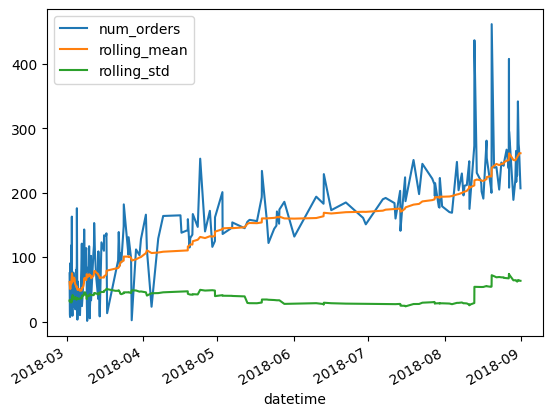

In [133]:
#Use the plot() method in order to plot the time series values of the columns in the
#data dataframe.
data.plot()

Observation:
According to the chart, the data appears nonstationary with significant outliers (peaks) noted from: 2018-08 to 2018-09. 
There appears to be an overall positive trend in the data, with the number of orders increasing overall throught the years,
with small decreases followed by an almost equal increase. There seems to be a steady and overall increasing rolling mean.  The
rolling standard deviation showed an overall steady decrease from 2018-03 to 2018-08, followed by an increase from 2018-08 to 2018-09.

#### Decomposed Charts

In [134]:
#Use the seasona_decompose() function in order to create a decomposed dataframe
#that includes: trends, seasonality, and residuals.
decomposed = seasonal_decompose(data['num_orders'], period=24) 

<Figure size 640x480 with 0 Axes>

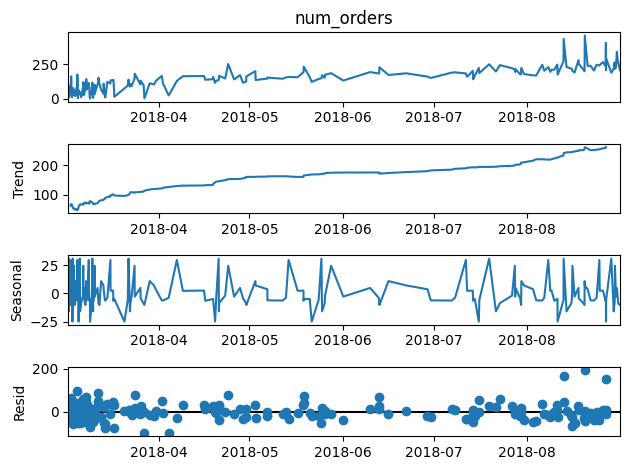

In [135]:
#Use matplotlib in order to display the decomposed data in charts.
plt.figure()
decomposed.plot()
plt.tight_layout()
plt.show()

Observation:
According to the first chart above, it appears that the data is nonstationary.  There seems to be increases and decreases in the
mean and standard deviations of the data throughout the time series.  I will discuss the trend, seasonal, and residual charts
in more detail in the cells below.

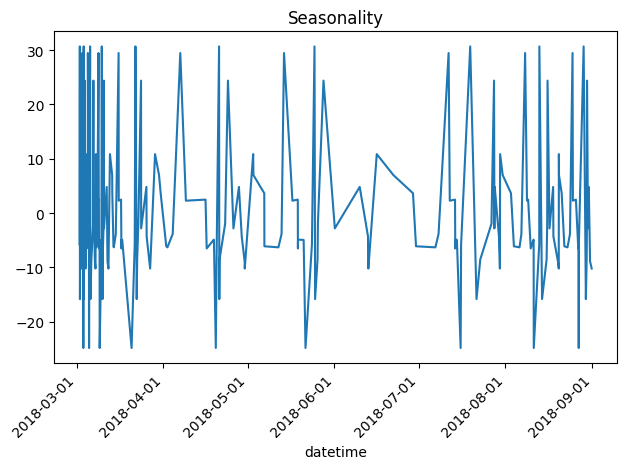

In [136]:
#Use matplotlib in order to create a chart that displays the seasonal data.
plt.figure()
decomposed.seasonal.plot()
plt.title('Seasonality')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observation:
There seems to be some seasonality noted,  between the dates: 2018-03-01 to 2018-06-01 there seems to be a
sharp decrease in the number of orders near the end of the year followed, by a sharp increase shortly after.
There appears to be a break in seasonality from: 2018-06-01 to 2018-07-01.  From 2018-07-01 to 2018-09-01, 
there appears to be sharp decreases in number of orders followed by a sharp increase several times throughout this 
time period with no specific chronological pattern.

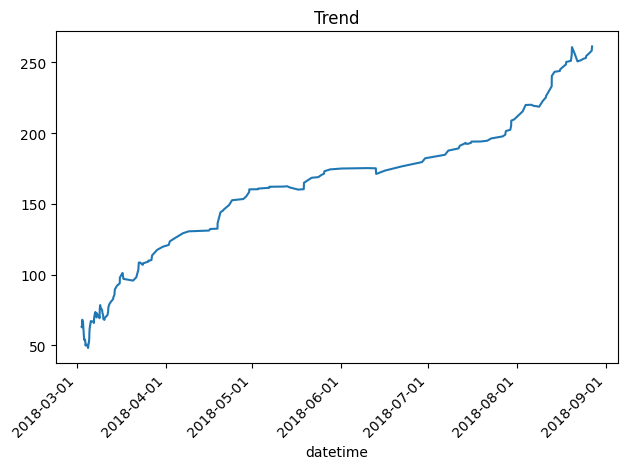

In [137]:
#Use matplotlib in order to create a chart that displays the trend data.
plt.figure() 
decomposed.trend.plot()
plt.title('Trend')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observation:
According to the chart, there seems to be an overall positive trend in the data with a gradual,
consistent increase in the number of orders throughout the time frame.  There are small decreases 
in the number of orders followed by a short increase shortly after.

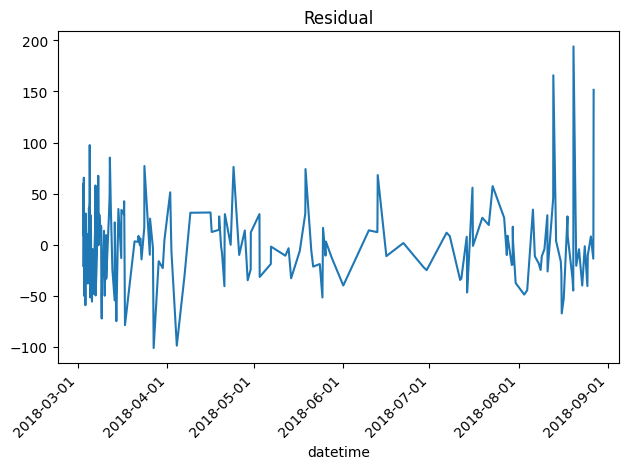

In [138]:
#Use matplotlib in order to create a chart that displays the residual data.
plt.figure()
decomposed.resid.plot()
plt.title('Residual')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation: 
There is some randomness noted in the residual data.  There appears to be some major peaks in the residual data
from: 2018-08-01 to 2018-09-01, which can indicate the presence of outliers.  The variance of the residual data
is not constant and shows changes over time.

#### ACF and PACF Plots

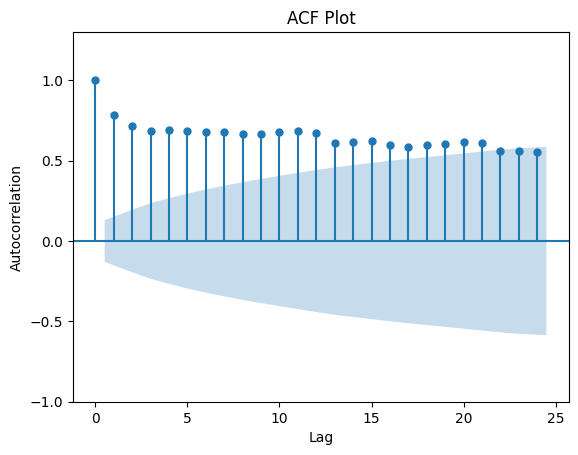

In [139]:
#Use the plot_acf() method in order to plot the number of lags that affect autoregression.
plot_acf(data['num_orders'])
plt.title('ACF Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.ylim(-1, 1.3)
plt.show()

Observation:
According to the ACF chart, it appears that lags 1-21 have a statistically significant autocorrelation. 
The lags have in overall negative autocorrelation noted.

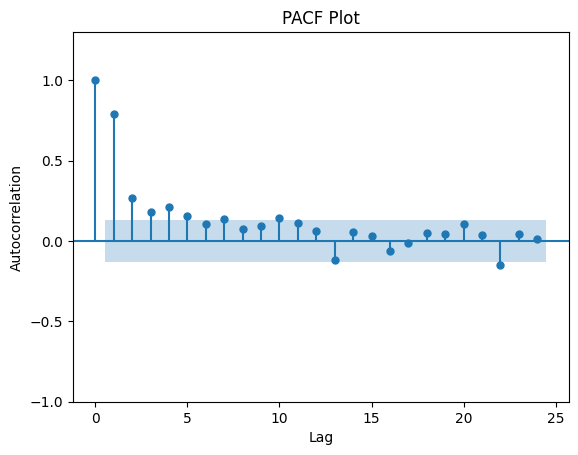

In [140]:
#Use the PACF Plot in order to plot the number of signigicant lags in the dataframe.
plot_pacf(data['num_orders'])
plt.title('PACF Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.ylim(-1, 1.3)
plt.show()

Code Result:
It appears the after the 4th lag, the 5th lag is located in the blue confidence interval area.  This finding
indicates that only 4 lags are necessary in the train the time series models.  The PACF chart also indicates
that the lags have an overall negative correlation.

#### Feature Creation

In [141]:
#Create a function named create_features() that creates timestamp features and lagged features.
def create_features(data, max_lag):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek 
    data['hour'] = data.index.hour
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

In [142]:
#Use the create_features() method in order to create timestamp and a total of 4 lag features in
#the data dataframe.
create_features(data, 4)

In [143]:
#Use the isna() and sum() methods in order to check the dataframe for missing values.
data.isna().sum()

num_orders      0
rolling_mean    0
rolling_std     0
year            0
month           0
day             0
dayofweek       0
hour            0
lag_1           1
lag_2           2
lag_3           3
lag_4           4
dtype: int64

Code Result:
It appears that there are missing values in the newly created lag columns of the data dataframe.
These missing values will be removed in the cell below.

In [144]:
#Use the dropna() method in order to drop missing values fromt the data dataframe.
data.dropna(inplace=True) 

#Use the isna() and sum() methods once again in order to double check for missing values.
data.isna().sum()

num_orders      0
rolling_mean    0
rolling_std     0
year            0
month           0
day             0
dayofweek       0
hour            0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
dtype: int64

Code Result:
There are no longer any missing values noted in the dataframe.

In [145]:
#Use the head() method in order to check the first five rows of the dataframe.
data.head()

,num_orders,rolling_mean,rolling_std,year,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4
datetime,,,,,,,,,,,,
2018-03-02 08:00:00,46,50.500000,32.611014,2018,3,2,4,8,7.0,11.0,20.0,75.0
2018-03-02 10:00:00,54,50.958333,32.578306,2018,3,2,4,10,46.0,7.0,11.0,20.0
2018-03-02 11:00:00,91,54.500000,32.094968,2018,3,2,4,11,54.0,46.0,7.0,11.0
2018-03-02 12:00:00,36,55.500000,31.070747,2018,3,2,4,12,91.0,54.0,46.0,7.0
2018-03-02 15:00:00,59,57.333333,29.851322,2018,3,2,4,15,36.0,91.0,54.0,46.0


Code Result:
It appears that the timestamp and lag features were successfully created.

#### Stationary Test 

In [146]:
#Use the addfuller method in order to perform a stationary test of the data
#dataframe.
stationary_test_check = adfuller(data['num_orders'])
p_value = stationary_test_check[1] 

#Print the P values of the stationary test.
print(f"P Value: {p_value:.2f}")

P Value: 0.95


Code Result: 
The P Value of the stationary test is 0.95, which is greater than the test's maximum threshhold of 0.05.
This result indicates that the dataset is non-stationary.  Differencing must be performed on this dataframe
in order to make the dataframe stationary.

#### Differencing

In [147]:
#Use the shift() method in order create a dataframe that results from differencing.  Differencing
#is done by subtracting the lagged values of the dataframe from the dataframe's original values.
data_diff = data - data.shift() 

#Use the isna() and sum() methods in order to check the data_diff dataframe for missing values.
data_diff.isna().sum()

num_orders      1
rolling_mean    1
rolling_std     1
year            1
month           1
day             1
dayofweek       1
hour            1
lag_1           1
lag_2           1
lag_3           1
lag_4           1
dtype: int64

Code Result: 
It appears that there are missing values noted in the data_diff dataframe.  These values will be dropped in the cell
below.

In [148]:
#Use the dropna() method in order to drop missing values from the dataframe.
data_diff.dropna(inplace=True) 

#Use the isna() and sum() methods in order to double check for missing values in the dataframe.
data_diff.isna().sum() 

num_orders      0
rolling_mean    0
rolling_std     0
year            0
month           0
day             0
dayofweek       0
hour            0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
dtype: int64

Code Result:
There are no missing values noted in the data_diff dataframe.  The missing values were successfully removed.

In [149]:
#Use the duplicated() and sum() methods in order to check for duplicate values in the data_diff dataframe.
data_diff.duplicated().sum()

0

Code Result: 
There are no duplicate values noted in the data_diff dataframe.

#### Stationary Test Recheck

In [150]:
#Use the adfuller() function once again in order to recheck if the dataframe is stationary.
stationary_test_recheck = adfuller(data_diff['num_orders'])
p_value_2 = stationary_test_recheck[1] 

#Print the stationary test's P value.
print(f"P Value: {p_value_2:.2f}")

P Value: 0.00


Code Result:
The dataframe's stationary test P value after differencing is now 0.00.  The dataframe is now stationary.

#### Splitting The Data

In [151]:
#Create a seed value for the random state.
seed = 12345 

#Use the np.random.RandomState() function in order to create a random state 
#for splitting the data and training the models.
state = np.random.RandomState(seed)

In [152]:
#Use the train_test_split() method in order to split the data into a training and test set with a
#90:10 ratio.  Set the shuffle parameter to False in order to ensure that the data is still kept
#in chronological order after the data splt.
train, test = train_test_split(data_diff, shuffle=False, test_size=0.1, random_state=state) 

#Print the minimum and maximum values for the train and test set indices 
#in order to check if the data is split in chronological order.
print(train.index.min(), train.index.max()) 
print(test.index.min(), test.index.max())

2018-03-02 10:00:00 2018-08-20 01:00:00
2018-08-20 02:00:00 2018-08-31 18:00:00


Code Result:
It appears that the data is split in chronological order because the last date at the end of the training set
is right before the first date for the beginning of the test set.

In [153]:
#Use the isna() and the sum() methods in order to check for missing values in the training set.
train.isna().sum()

num_orders      0
rolling_mean    0
rolling_std     0
year            0
month           0
day             0
dayofweek       0
hour            0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
dtype: int64

Code Result: 
There are no missing values present in the training set.

In [154]:
#Use the isna() and the sum() methods in order to check for missing values in the test set.
test.isna().sum()

num_orders      0
rolling_mean    0
rolling_std     0
year            0
month           0
day             0
dayofweek       0
hour            0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
dtype: int64

Code Result: 
There are no missing values present in the test set.

In [155]:
##Use the duplicated() and the sum() methods in order to check for duplicate values in the training set.
train.duplicated().sum()

0

Code Result: 
There are no missing values present in the training set.

In [156]:
##Use the duplicated() and the sum() methods in order to check for duplicate values in the test set.
test.duplicated().sum()

0

Code Result: 
There are no missing values present in the test set.

In [157]:
#Create the target and features for the training set.
X_train = train.drop(['num_orders'], axis=1) 
y_train = train['num_orders'] 

#Create the target and features for the test set.
X_test = test.drop(['num_orders'], axis=1) 
y_test = test['num_orders']

In [158]:
#Use the isna() and sum() methods in order to check for missing values in features of the 
#training set.
X_train.isna().sum()

rolling_mean    0
rolling_std     0
year            0
month           0
day             0
dayofweek       0
hour            0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
dtype: int64

Code Result:
It appears that there are no missing values noted in X_train.

In [159]:
#Use the isna() and sum() methods in order to check for missing values in features of the 
#test set.
X_test.isna().sum()

rolling_mean    0
rolling_std     0
year            0
month           0
day             0
dayofweek       0
hour            0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
dtype: int64

Code Result:
It appears that there are no missing values noted in X_test.

In [160]:
#Use the isna() and sum() methods in order to check for missing values in target of the 
#training set.
y_train.isna().sum()

0

Code Result:
It appears that there are no missing values noted in y_train.

In [161]:
#Use the isna() and sum() methods in order to check for missing values in target of the 
#test set.
y_test.isna().sum()

0

Code Result:
It appears that there are no missing values noted in y_test.

In [162]:
#Use the duplicated() and sum() methods in order to check for 
#duplicate values in the features of the training set.
X_train.duplicated().sum()

0

Code Result:
It appears that there are no duplicate values noted in X_train.

In [163]:
#Use the duplicated() and sum() methods in order to check for 
#duplicate values in the features of the test set.
X_test.duplicated().sum()

0

Code Result:
Code Result:
It appears that there are no duplicate values noted in X_test.

In [164]:
#Use the duplicated() and sum() methods in order to check for 
#duplicate values in the target of the training set.
y_train.duplicated().sum()

90

Code Result:
There are 90 duplicate values noted in y_train.

In [165]:
#Use the drop_duplicates() method in order to drop duplicate values from 
#y_train.  Set the inplace parameter to True.
y_train.drop_duplicates(inplace=True) 

#Use the duplicated() and sum() methods in order to double check for 
#duplicate values in the target of the training set.
y_train.duplicated().sum()

/tmp/ipykernel_115/1606317253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.drop_duplicates(inplace=True)


0

Code Result:
There are no longer any duplicate values noted in y_train. 
The duplicate values were successfully removed.

In [166]:
#Use the duplicated() and sum() methods in order to check for 
#duplicate values in the target of the test set.
y_test.duplicated().sum()

1

Code Result:
It appears that there is 1 duplicate value noted in y_test.

In [167]:
#Use the drop_duplicates() method in order to drop duplicate values from 
#y_test.  Set the inplace parameter to True.
y_test.drop_duplicates(inplace=True) 

#Use the duplicated() and sum() methods in order to double check for 
#duplicate values in the target of the test set.
y_test.duplicated().sum()

/tmp/ipykernel_115/676580421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test.drop_duplicates(inplace=True)


0

Code Result:
There are no longer any duplicate values noted in y_train. 
The duplicate values were successfully removed.

#### Scaled Features

In [168]:
#Create an index for the numerical features columns for scaling.
numerical_features = ['rolling_std',
                      'rolling_mean',
                      'lag_1',
                      'lag_2',
                      'lag_3',
                      'lag_4']

In [169]:
#Use StandardScaler() in order to create a scaler to scale the data.
scaler = StandardScaler() 

#Use the fit_transform() method in order to scale the numerical features for X_train.
X_train_scaled_array = scaler.fit_transform(X_train[numerical_features])
#Use the fit_transform() method in order to scale the numerical features for X_test.
X_test_scaled_array = scaler.transform(X_test[numerical_features])

In [170]:
#Use the pd.Dataframe() method in order to create dataframes for the numerical features for X_train and 
#X_test.
X_train_numerical_df= pd.DataFrame(X_train_scaled_array, columns=numerical_features, index=X_train.index)
X_test_numerical_df = pd.DataFrame(X_test_scaled_array, columns=numerical_features, index=X_test.index) 

#Create dataframes for the categorical features for X_train and X_test.
X_train_categorical_df = X_train.drop(columns=numerical_features) 
X_test_categorical_df = X_test.drop(columns=numerical_features) 

#Use the pd.concat() method inorder to concatenate the numerical and categorical dataframes 
#for X_train and X_test with scaled features.
X_train_scaled = pd.concat([X_train_numerical_df, X_train_categorical_df], axis=1)
X_test_scaled = pd.concat([X_test_numerical_df, X_test_categorical_df], axis=1)

In [171]:
#Use the isna() and sum() methods in order to check for missing values in X_train_scaled.
X_train_scaled.isna().sum()

rolling_std     0
rolling_mean    0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
year            0
month           0
day             0
dayofweek       0
hour            0
dtype: int64

Code Result:
There are no missing values noted in X_train_scaled.

In [172]:
#Use the isna() and sum() methods in order to check for missing values in X_test_scaled.
X_test_scaled.isna().sum()

rolling_std     0
rolling_mean    0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
year            0
month           0
day             0
dayofweek       0
hour            0
dtype: int64

Code Result:
There are no duplicate values noted in X_train_scaled.

In [173]:
#Use the isna() and sum() methods in order to check for duplicate values in X_train_scaled.
X_train_scaled.duplicated().sum()

0

Code: 
It appears that there are no duplicate values noted in X_train_scaled.

In [174]:
#Use the isna() and sum() methods in order to check for duplicate values in X_test_scaled.
X_test_scaled.duplicated().sum()

0

Code: 
It appears that there are no duplicate values noted in X_test_scaled.

#### Aligning Target and Feature Rows

Rationale:
In the cells below, I will concatenate the scaled features with the target data for both the training and the test set
in order to ensure that rows of the scaled features and the target datasets are aligned correctly.  Then I will separate the
the data again in order to create: X_train_scaled, y_train, X_test_scaled and y_test once again.

In [175]:
#Use the pd.concat() method in order to concatenate the X_train_scaled and
#y_train dataframes.
train_data = pd.concat([X_train_scaled, y_train], axis=1)

In [176]:
#Use the isna() and sum() methods in order to check for missing values in train_data.
train_data.isna().sum()

rolling_std      0
rolling_mean     0
lag_1            0
lag_2            0
lag_3            0
lag_4            0
year             0
month            0
day              0
dayofweek        0
hour             0
num_orders      90
dtype: int64

Code Result: 
There are several missing values noted in train_data.  

In [177]:
#Use the dropna() method in order to drop the missing values from train_data.
train_data.dropna(inplace=True) 

#Use the isna() and sum() methods once again in order to double check for missing values in
#train_data.
train_data.isna().sum()

rolling_std     0
rolling_mean    0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
year            0
month           0
day             0
dayofweek       0
hour            0
num_orders      0
dtype: int64

Code Result:
There are no missing values noted in train_data.  The missing values were successfully dropped.

In [178]:
#Create the X_train_scaled and y_train dataframes once again with the appropriate columns.
X_train_scaled = train_data.drop(columns='num_orders') 
y_train = train_data['num_orders']

In [179]:
#Use the pd.concat() method in order to concatenate the X_test_scaled and
#y_test dataframes.
test_data = pd.concat([X_test_scaled, y_test], axis=1) 

In [180]:
#Use the isna() and sum() methods in order to check for missing values in test_data.
test_data.isna().sum()

rolling_std     0
rolling_mean    0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
year            0
month           0
day             0
dayofweek       0
hour            0
num_orders      1
dtype: int64

Code Result: 
There are several missing values noted in test_data.  

In [181]:
#Use the dropna() method in order to drop the missing values from test_data. 
test_data.dropna(inplace=True) 

#Use the isna() and sum() methods once again in order to double check for missing values in
#test_data.
test_data.isna().sum()

rolling_std     0
rolling_mean    0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
year            0
month           0
day             0
dayofweek       0
hour            0
num_orders      0
dtype: int64

Code Result:
There are no missing values noted in test_data.  The missing values were successfully dropped.

In [182]:
#Use the duplicated() and sum() methods in order to check for duplicate values in train_data.
train_data.duplicated().sum()

0

Code Result:
There are no duplicate values noted in train_data.

In [183]:
#Use the duplicated() and sum() methods in order to check for duplicate values in test_data.
test_data.duplicated().sum()

0

Code Result:
There are no duplicate values noted in test_data.

In [184]:
#Create the X_test_scaled and y_test dataframes once again with the appropriate columns.
X_test_scaled = test_data.drop(columns='num_orders') 
y_test = test_data['num_orders']

#### RMSE function

In [185]:
#Create a function in order to calculate the RMSE for each model.
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred)) 

#Use the make_scorer() method in order to create a scorer for the models using the RMSE metric.
#Set the greater_is_better parameter to False.
rmse_scorer = make_scorer(rmse, greater_is_better=False)

#### Baseline RMSE

In [186]:
#Use the np.mean() method in order to get the mean for the training set of the target dataset.
y_mean_pred = np.mean(y_train)
#Use the rmse() function to calculate the rmse of between the training set of the target dataset and 
#the product of the mean for the training set of the target dataset and the length the of the
#training set of target datset. This will be the baseline rmse for the dataset.
baseline_rmse = rmse(y_train, [y_mean_pred] * len(y_train)) 


#Create a function that calculates the RMSE error percentage.
def rmse_percentage(model_rmse, y_mean):
    percentage = (model_rmse / y_mean) * 100
    return percentage

In [187]:
y_mean = np.mean(data['num_orders'])
y_mean_pred = np.mean(y_test) 

baseline_rmse = rmse(y_test, [y_mean_pred] * len(y_test)) 

print(f"Basline RMSE {baseline_rmse:.2f}") 
print(f"Basline RMSE Percentage: {rmse_percentage(baseline_rmse, y_mean):.2f} %")

Basline RMSE 94.70
Basline RMSE Percentage: 67.85 %


## Training

Note To Reviewer:
I originally intended to make predictions on all the models using the training set first without making predictions on the
test set and saving the test set for the final selected model with the best RMSE, but the final model that I chose with the best RMSE for the 
test set prediction did not have a better RMSE on the training set prediction in comparison to the other models.  The majority of my non time series based models did worse on making predictions on the test set than on making prediction on the trainings set. So, I decided to display
the training set and test set predictions for each and every non time series based models.  I just felt this method was more interpretable and
made more sense.  My apologies for the inconvenience.

#### Linear Regression Model

In [188]:
#Use LinearRegression() in order to create a Linear Regression model.
lr = LinearRegression() 

#Use the fit() method in order to train the Linear Regression model with the
#scaled features and target of the training set.
lr.fit(X_train_scaled, y_train) 

LinearRegression()

In [189]:
#Use the predict() method in order to make a prediction for the model
#using the scaled features for the test set.
lr_test_predicted = lr.predict(X_test_scaled) 

#Use the rmse() method in order to calculate the RMSE on the test set.
lr_test_rmse  = rmse(y_test, lr_test_predicted) 
print(f"Linear Regression Model Test Set RMSE: {lr_test_rmse:.2f}")
print(f"Linear Regression Model Test Set RMSE Percentage: {rmse_percentage(lr_test_rmse, y_mean):.2f} %")

Linear Regression Model Test Set RMSE: 45.97
Linear Regression Model Test Set RMSE Percentage: 32.94 %


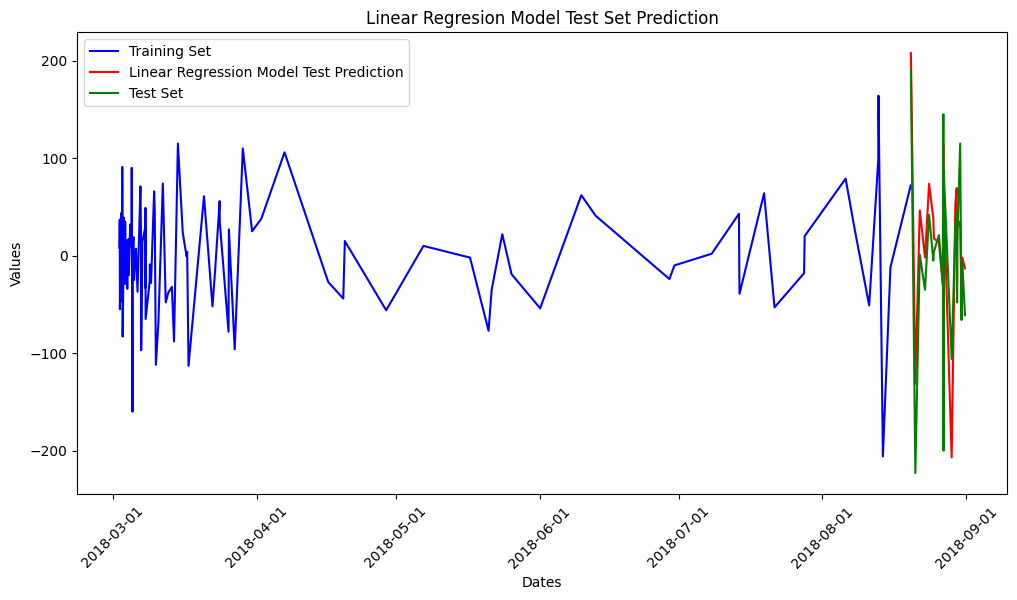

In [190]:
#Use matplotlib in order to create a chart displaying the predictions for the Linear Regression model.
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, color='blue', label='Training Set')
plt.plot(y_test.index, lr_test_predicted, color='red', label='Linear Regression Model Test Prediction')
plt.plot(y_test.index, y_test, color='green', label='Test Set')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
plt.title('Linear Regresion Model Test Set Prediction')
plt.xlabel('Dates')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.show() 

Conclusion:
Although not perfect, the Linear Regression model's predicitons are fairly close  to the actual value test set values. Also, because the Linear Regression Model's RMSE satisfies the project RMSE requirement (less than 48), this model would be a good candidate for making predictions for the company.

#### Random Forest Regressor Model

In [191]:
#Use RandomForestRegressor() in order to create a Random Forest Regressor model.
rfr = RandomForestRegressor(random_state=state)

In [192]:
#Create a paramter grid for the Random Forest Regressor Model's GridSearch.
rfr_param_grid ={
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

In [193]:
#Create a GridSearch model for the Random Forest Regressor model using GridSearchCV().
rfr_gsearch = GridSearchCV(estimator=rfr, 
                           param_grid=rfr_param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring=rmse_scorer) 

#Use the fit() method in order to train the RandomForestRegressor() model with the scaled features and
#the target of the training set.
rfr_gsearch.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_es

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(random_state=RandomState(MT19937) at 0x7FE162086B40),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring=make_scorer(rmse, greater_is_better=False), verbose=2)

In [194]:
#Use the best_score_ method in order to get the best score for the model. 
print(f"Random Forest Regressor Model Best Score: {rfr_gsearch.best_score_:.2f}") 
#Use the best_params_ method in order to get the best score for the model.
print(f"Random Forest Regressor Model Best Hyperparameters: \n{rfr_gsearch.best_params_}")

Random Forest Regressor Model Best Score: -48.25
Random Forest Regressor Model Best Hyperparameters: 
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [195]:
#Recreate the RandomForestRegressor model with tuned hyperparameters.
rfr = RandomForestRegressor(max_depth=None,
                            max_features='sqrt',
                            min_samples_leaf=2,
                            min_samples_split=5,
                            n_estimators=500) 

#Use the fit() method in order to fit the Random Forest Regressor model with the scaled features and target
#of the training set.
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=500)

In [196]:
#Use the predict() method in order to make a prediction for the model
#using the scaled features for the test set.
rfr_test_predicted = rfr.predict(X_test_scaled) 

#Use the rmse() method in order to calculate the RMSE on the test set.
rfr_test_rmse  = rmse(y_test, rfr_test_predicted) 
print(f"Random Forest Regressor Model Test Set RMSE: {rfr_test_rmse:.2f}") 
print(f"Random Forest Regressor Model Test Set RMSE Error Percentage: {rmse_percentage(rfr_test_rmse, y_mean):.2f} %")

Random Forest Regressor Model Test Set RMSE: 71.34
Random Forest Regressor Model Test Set RMSE Error Percentage: 51.11 %


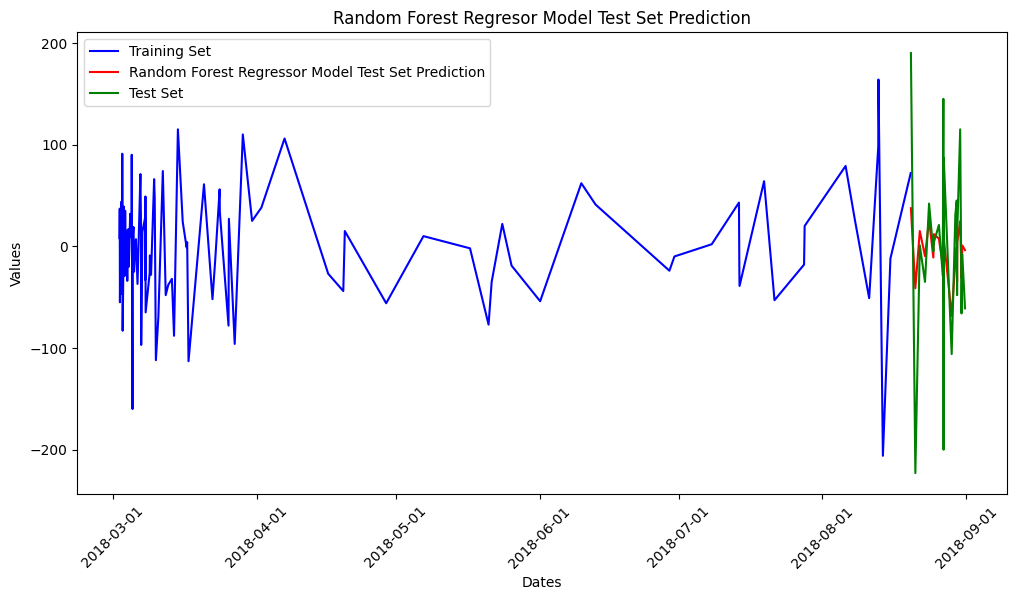

In [197]:
#Use matplotlib in order to create a chart displaying the predictions for the Random Forest Regressor model.
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, color='blue', label='Training Set')
plt.plot(y_test.index, rfr_test_predicted, color='red', label='Random Forest Regressor Model Test Set Prediction')
plt.plot(y_test.index, y_test, color='green', label='Test Set')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
plt.title('Random Forest Regresor Model Test Set Prediction')
plt.xlabel('Dates')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.show() 

Code Result:
It appears that the Random Forest Regressor's RMSE of: 71.76 did not meet the project's minimum RMSE requirement of 48 or less. 
The model's test set prediction was also not visually close to the actual test set values in the chart displayed above as well.

#### Light GBM Regressor Model

In [198]:
#Use LGBMRegressor() in order to create a Light GBM Regressor model.
lgb = LGBMRegressor(random_state=state)

In [199]:
#Create a parameter grid for the Light GBM model.
lgb_param_grid = {
    'num_leaves': [31],
    'learning_rate': [0.1],
    'n_estimators': [100, 200]
}

In [200]:
#Create a GridSearch for the LightGBM Model using GridSearchCV()
lgb_gsearch = GridSearchCV(estimator=lgb,
                           param_grid=lgb_param_grid,
                           scoring=rmse_scorer,
                           cv=3,
                           verbose=2,
                           n_jobs=-1) 

#Use the fit() method in order to train the GridSearch model with the training sets of the 
#scaled features dataset and target datasets.
lgb_gsearch.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END .learning_rate=0.1, n_estimators=100, num_leaves=31; total time=   0.0s
[CV] END .learning_rate=0.1, n_estimators=100, num_leaves=31; total time=   0.1s
[CV] END .learning_rate=0.1, n_estimators=100, num_leaves=31; total time=   0.0s
[CV] END .learning_rate=0.1, n_estimators=200, num_leaves=31; total time=   0.1s
[CV] END .learning_rate=0.1, n_estimators=200, num_leaves=31; total time=   0.0s
[CV] END .learning_rate=0.1, n_estimators=200, num_leaves=31; total time=   0.0s


GridSearchCV(cv=3,
             estimator=LGBMRegressor(random_state=RandomState(MT19937) at 0x7FE162086B40),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'n_estimators': [100, 200],
                         'num_leaves': [31]},
             scoring=make_scorer(rmse, greater_is_better=False), verbose=2)

In [201]:
#Use the best_score_ method in order to print the model's best score.
print(f"LightGBM Model Best Score: {lgb_gsearch.best_score_:.2f}")
#Use the best_params_ method in order to print the model's best hyperparameters.
print(f"LightGBM Model Best Hyperparameters: {lgb_gsearch.best_params_}")

LightGBM Model Best Score: -47.12
LightGBM Model Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}


In [202]:
#Recreate the Light GBM Regressor model with tuned hyperparameters.
lgb = LGBMRegressor(learing_rate=0.1,
                    n_estimators=100,
                    num_leaves=31,
                    random_state=state) 

#Use the fit() method in order to train the Light GBM Regressor model
#with the scaled features and target of the training set.
lgb.fit(X_train_scaled, y_train)

LGBMRegressor(learing_rate=0.1,
              random_state=RandomState(MT19937) at 0x7FE162086B40)

In [203]:
#Use the predict() method in order to make a prediction for the model
#using the scaled features for the test set.
lgb_test_predicted = lgb.predict(X_test_scaled) 

#Use the rmse() method in order to calculate the RMSE on the test set.
lgb_test_rmse  = rmse(y_test, lgb_test_predicted) 
print(f"Light GBM Model Test Set RMSE: {lgb_test_rmse:.2f}")
print(f"Light GBM Regressor Model Test Set RMSE Error Percentage: {rmse_percentage(lgb_test_rmse, y_mean):.2f} %")

Light GBM Model Test Set RMSE: 67.55
Light GBM Regressor Model Test Set RMSE Error Percentage: 48.40 %


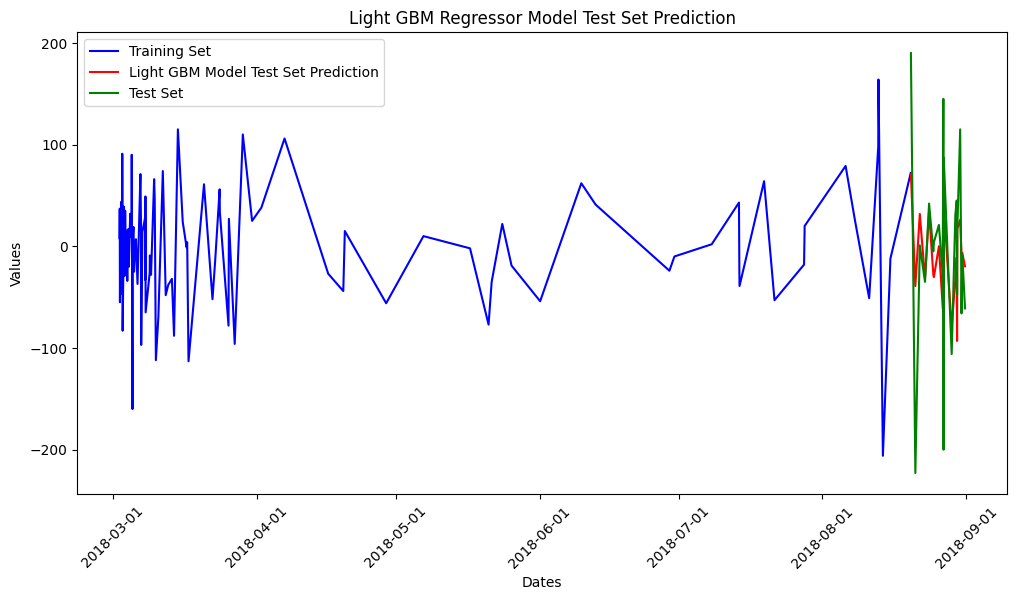

In [204]:
#Use matplotlib in order to create a chart displaying the predictions for the Light GBM Regressor model.
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, color='blue', label='Training Set')
plt.plot(y_test.index, lgb_test_predicted, color='red', label='Light GBM Model Test Set Prediction')
plt.plot(y_test.index, y_test, color='green', label='Test Set')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
plt.title('Light GBM Regressor Model Test Set Prediction')
plt.xlabel('Dates')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.show() 

Code Result:
It appears that the Light GBM Regressor's RMSE of: 67.55 did not meet the project's minimum RMSE requirement of 48 or less.
The model's test set prediction was also not visually close to the actual test set values in the chart displayed above as well.

#### Start and End Values

In [205]:
#Create start and end values for the training set predictions
start_value = len(y_train)
end_value = start_value + len(y_test) - 1

#### AutoRegression (AR) Model

In [206]:
#Use the arma_order_select_ic() method in order to determine the autoregressive model order.
arma_lags = arma_order_select_ic(y_train, max_ar=6, max_ma=6)

/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/python3/lib/python3.9/site-packages/sta

In [207]:
#Use bic_min_order in order to print the AR order.
arma_lags.bic_min_order

(2, 0)

Code Result:
According to the tuple generated from bic_min_order.  The first term "2" indicates the maximum number of lags needed for
the autoregressive part of the model.  The second term "0" indicates the maximum number of lags needed moving average part
of the model.

In [208]:
#Use the ar_select_order_method() in order to determine the lags that define the AR order.
mod = ar_select_order(endog=y_train, maxlag=2)
ar_order = mod.ar_lags 
print(f"Lags that define AR order:{ar_order}")

Lags that define AR order:[1, 2]


/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [209]:
#Use the AutoReg() method to create an Auto Regression model. Use the ar_order variable to define the lags.
#Use the target of the training set as input to train the model.
ar_model = AutoReg(y_train, lags=ar_order) 

/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [210]:
#Use the fit() method in order to train the model.
ar_result = ar_model.fit()
#Use the predict() method in order to make a prediction for the model.
ar_pred = ar_result.predict(start=start_value, end=end_value, dynamic=False)

/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [211]:
#Use the rmse() method in order to calculate the RMSE for the AR Model.
ar_rmse = rmse(y_test, ar_pred)
print(f"AutoRegression (AR) Model RMSE: {ar_rmse:.2f}") 
print(f"AutoRegression (AR) Model RMSE Error Percentage: {rmse_percentage(ar_rmse, y_mean):.2f} %")

AutoRegression (AR) Model RMSE: 95.24
AutoRegression (AR) Model RMSE Error Percentage: 68.24 %


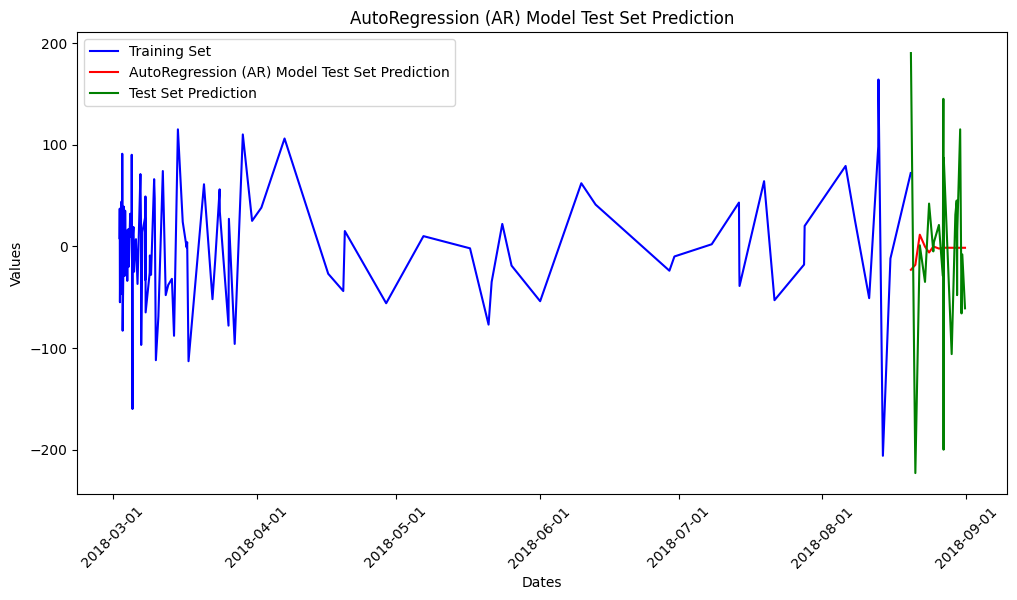

In [212]:
#Use matplotlib in order to create a chart displaying the predictions for the AutoRegression model.
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, color='blue', label='Training Set')
plt.plot(y_test.index, ar_pred, color='red', label='AutoRegression (AR) Model Test Set Prediction')
plt.plot(y_test.index, y_test, color='green', label='Test Set Prediction')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
plt.title('AutoRegression (AR) Model Test Set Prediction')
plt.xlabel('Dates')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.show() 

Observation:
The Autoregession (AR) model's predicted values failed to make accurate predictions of the test set value.  The model's RMSE of: 95.24 failed to meet the project's minimum RMSE of 48 or less.  The model's test set prediction was also not visually close to the actual test set values in the chart displayed above as well.

#### Non-seasonal auto_arima()

Rationale:  I used the auto_arima() function in find the p (autoregression), d (differencing), and q (moving average) terms for each model based on the resampled data.

In [213]:
#Use the auto_arima() function in order to determine the order for an ARIMA/ARMA model.
#Set the seasonal hyperparameter to False.
pmd_model = auto_arima(train['num_orders'], seasonal=False, m=24, scoring=rmse_scorer)

/opt/conda/envs/python3/lib/python3.9/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (24) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


In [214]:
#Print the p(autoregressive component), d(differncing term), and q(moving average component)
#of the ARMA model.
print(f"p= {pmd_model.order[0]}")
print(f"d= {pmd_model.order[1]}")
print(f"q={pmd_model.order[2]}")

p= 1
d= 0
q=3


### Moving Average (MA) Model 

In [215]:
#Use the ARIMA() method in order to create an MA model(with 0 set as the differencing term). 
#Use the target of the training set in order to train the model.
ma_model = ARIMA(train['num_orders'], order=(0, 0, 3)) 
#Use the fit() method in order to train the MA model.
ma_result = ma_model.fit() 

/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [216]:
steps = len(test)
#Use the get_forecast() method in order to make a prediction on the MA model.
ma_pred = ma_result.get_forecast(steps=steps)
#Use the predicted_mean in order to get the predict mean of the model forecast.
ma_forecast_values = ma_pred.predicted_mean
#Use the conf_int() method in order to get the confidence intervals for the model prediction.
ma_conf_int = ma_pred.conf_int()
ma_conf_int.index = test.index
ma_conf_int = ma_conf_int.loc[y_test.index]
ma_conf_int.columns = ['ma_lower_ci', 'ma_upper_ci']

/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [217]:
#Use the RMSE method in order to calculate the RMSE for the MA model.
ma_rmse = rmse(test['num_orders'], ma_forecast_values)
print(f"MA Model RMSE: {ma_rmse:.2f}")
print(f"MA Model RMSE Error Percentage: {rmse_percentage(ma_rmse, y_mean):.2f} %")

MA Model RMSE: 93.57
MA Model RMSE Error Percentage: 67.04 %


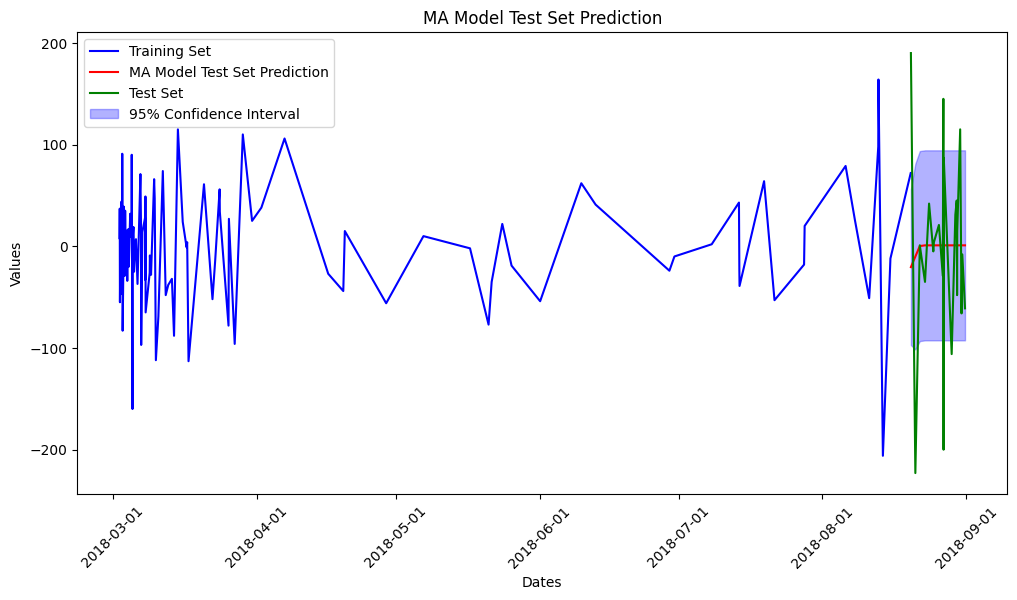

In [218]:
#Use matplotlib in order to create a chart displaying the predictions for the ARMA model.
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, color='blue', label='Training Set')
plt.plot(test.index, ma_forecast_values, color='red', label='MA Model Test Set Prediction')
plt.plot(y_test.index, y_test, color='green', label='Test Set')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 

plt.fill_between(
    y_test.index,
    ma_conf_int['ma_lower_ci'],
    ma_conf_int['ma_upper_ci'],
    color='blue', alpha=0.3, label='95% Confidence Interval')


plt.title('MA Model Test Set Prediction')
plt.xlabel('Dates')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.show() 

Observation:
The Moving Average (MA) model's predicted values failed to make accurate predictions of the test set value.  The model's RMSE of: 93.57 failed to meet the project's minimum RMSE of 48 or less.  The model's test set prediction was also not visually close to the actual test set values in the chart displayed above as well. 

#### ARMA Model

Rationale: The model that I created is considered an ARMA model and not an ARIMA model
because the differencing term is 0, which would indicate no model differncing required for the current dataset because
the dataset has already had differencing done in the data preprocessing phase.

In [219]:
#Use the ARIMA() method in order to create an ARMA model(with 0 set as the differencing term). 
#Use the target of the training set in order to train the model.
arma_model = ARIMA(train['num_orders'], order=(1, 0, 3)) 
#Use the fit() method in order to train the ARMA model.
arma_result = arma_model.fit() 

/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [220]:
steps = len(test)
#Use the get_forecast() method in order to make a prediction on the ARMA model.
arma_pred = arma_result.get_forecast(steps=steps)
#Use the predicted_mean in order to get the predict mean of the model forecast.
arma_forecast_values = arma_pred.predicted_mean
#Use the conf_int() method in order to get the confidence intervals for the model prediction.
arma_conf_int = arma_pred.conf_int()
arma_conf_int.index = test.index
arma_conf_int = arma_conf_int.loc[y_test.index]
arma_conf_int.columns = ['arma_lower_ci', 'arma_upper_ci']

/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [221]:
#Use the RMSE method in order to calculate the RMSE for the ARMA model.
arma_rmse = rmse(test['num_orders'], arma_forecast_values)
print(f"ARMA Model RMSE: {arma_rmse:.2f}")
print(f"ARMA Model RMSE Error Percentage: {rmse_percentage(arma_rmse, y_mean):.2f} %")

ARMA Model RMSE: 98.03
ARMA Model RMSE Error Percentage: 70.24 %


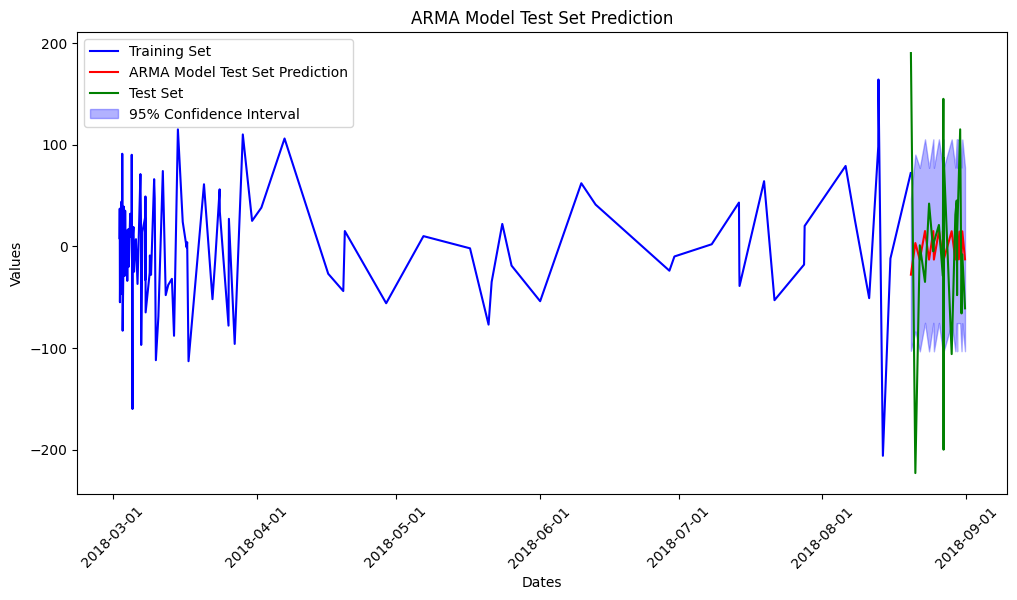

In [222]:
#Use matplotlib in order to create a chart displaying the predictions for the ARMA model.
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, color='blue', label='Training Set')
plt.plot(test.index, arma_forecast_values, color='red', label='ARMA Model Test Set Prediction')
plt.plot(y_test.index, y_test, color='green', label='Test Set')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 

plt.fill_between(
    y_test.index,
    arma_conf_int['arma_lower_ci'],
    arma_conf_int['arma_upper_ci'],
    color='blue', alpha=0.3, label='95% Confidence Interval')


plt.title('ARMA Model Test Set Prediction')
plt.xlabel('Dates')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.show() 

Observation:
The Autoregessive Moving Average (ARMA) model's predicted values failed to make accurate predictions of the test set value.  The model's RMSE of: 98.03 failed to meet the project's minimum RMSE of 48 or less.  The model's test set prediction was also not visually close to the actual test set values in the chart displayed above as well. 

#### Seasonal auto_arima()

Rationale:  I have used the auto_arima() function in order to get the p,d,q terms for the SARIMAX model as well, but in this case seasonality is taken into account as well.

In [223]:
#Use the auto_arima() method in order to determine the order for a SARIMAX model by setting the
#seasonal hyperparameter to true.
pmd_model = auto_arima(train['num_orders'], seasonal=True, m=24, scoring=rmse_scorer)

In [224]:
#Print the p(autoregressive component), d(differncing term), and q(moving average component)
#of the SARIMAX model.
print(f"p= {pmd_model.order[0]}")
print(f"d= {pmd_model.order[1]}")
print(f"q={pmd_model.order[2]}")

p= 1
d= 0
q=3


Observation:
Similar to the ARMA model, the differncing or "d" term has a value of 0, which would indicate that there is no
model differencing required for the SARIMAX model as well.

#### SARIMAX Model

In [225]:
#Use the SARIMAX() method in order to create a SARIMAX model(with 0 set as the differencing term). 
#Use the target of the training set in order to train the model.
SARIMAX = SARIMAX(train['num_orders'], order=(1, 0, 3), seasonal_order=(1, 0, 3, 24)) 

#Use the fit() method in order to train the SARIMAX model.
sarimax_result = SARIMAX.fit()

/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.11001D+00    |proj g|=  1.40379D-01


 This problem is unconstrained.



At iterate    5    f=  5.09523D+00    |proj g|=  2.60740D-03

At iterate   10    f=  5.09299D+00    |proj g|=  2.12993D-02

At iterate   15    f=  5.09220D+00    |proj g|=  5.26146D-05

At iterate   20    f=  5.09220D+00    |proj g|=  3.36067D-04

At iterate   25    f=  5.09218D+00    |proj g|=  6.06896D-04

At iterate   30    f=  5.09218D+00    |proj g|=  7.45914D-04

At iterate   35    f=  5.09209D+00    |proj g|=  3.26774D-03

At iterate   40    f=  5.09176D+00    |proj g|=  4.46621D-03

At iterate   45    f=  5.08976D+00    |proj g|=  1.36826D-02


/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.08360D+00    |proj g|=  3.44080D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58      1     0     0   3.441D-03   5.084D+00
  F =   5.0836043524492682     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [226]:
#Use the get_forecast() method in order to make a prediction on the SARIMAX model.
sarimax_pred = sarimax_result.get_forecast(steps=len(test))
#Use the predicted_mean in order to get the predict mean of the model forecast.
sarimax_forecast_values = sarimax_pred.predicted_mean
#Use the conf_int() method in order to get the confidence intervals for the model prediction.
sarimax_conf_int = sarimax_pred.conf_int()
sarimax_conf_int.index = test.index
sarimax_conf_int = sarimax_conf_int.loc[y_test.index]
sarimax_conf_int.columns = ['sarimax_lower_ci', 'sarimax_upper_ci']

/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [227]:
#Use the rsme() method in order to calculate the RMSE for a SARIMAX model.
sarimax_rmse = rmse(test['num_orders'], sarimax_forecast_values)
print(f"SARIMAX Model RMSE: {sarimax_rmse:.2f}") 
print(f"SARIMAX Model RMSE Error Percentage: {rmse_percentage(sarimax_rmse, y_mean):.2f} %")

SARIMAX Model RMSE: 98.02
SARIMAX Model RMSE Error Percentage: 70.23 %


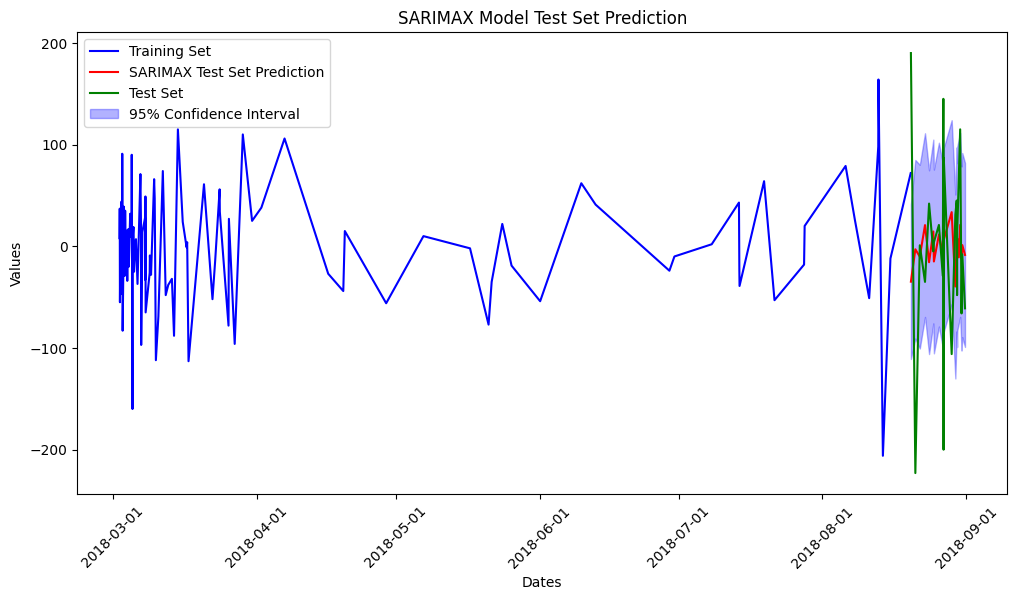

In [228]:
#Use matplotlib in order to create a chart displaying the predictions for the SARIMAX model.
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, color='blue', label='Training Set')
plt.plot(test.index, sarimax_forecast_values, color='red', label='SARIMAX Test Set Prediction')
plt.plot(y_test.index, y_test, color='green', label='Test Set')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 

plt.fill_between(
    y_test.index,
    sarimax_conf_int['sarimax_lower_ci'],
    sarimax_conf_int['sarimax_upper_ci'],
    color='blue', alpha=0.3, label='95% Confidence Interval')

plt.title('SARIMAX Model Test Set Prediction')
plt.xlabel('Dates')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.show() 

Observation:
The SARIMAX model's predicted values failed to make accurate predictions of the test set value.  The model's RMSE of: 97.21 failed to meet the project's minimum RMSE of 48 or less.  The model's test set prediction was also not visually close to the actual test set values in the chart displayed above as well. The SARIMAX model's poor prediction performance may be due to the fact that the dataset originally only comprised of the num_orders and the date columns.  The SARIMAX model had no exogenous features from the original dataset available in order to increase the model's prediction performance.

## Choosing The Best Model

Best Model Conclusion:
According to the results, the Linear Regression model had the lowest RMSE score when making a prediction
on the test set.  The Linear Regression Model had a an RMSE of 45.97 when making a prediction on the test 
set.  The Linear Regression model's RMSE is an acceptable RMSE and is lower than the RMSE required for
the project which is 48.  This result would make the Linear Regression model the best cadidate to make future predictions for the company.  The fact that the Linear Regression model had the best training set prediction could likely be due to the fact that there may be a strong linear trend in the dataset.  There were also no other numerical or categorical features from the original dataset (prior to feature engineering which relied soley on the num_orders column) that could've helped the mutlivariate and time series models make better predictions.

In [229]:
#Use the rmse() method in order to calculate the RMSE on the test set.
lr_test_rmse  = rmse(y_test, lr_test_predicted) 
print(f"Linear Regression Model Test Set RMSE: {lr_test_rmse:.2f}")
print(f"Linear Regression Model Test Set RMSE Percentage: {rmse_percentage(lr_test_rmse, y_mean):.2f} %")

Linear Regression Model Test Set RMSE: 45.97
Linear Regression Model Test Set RMSE Percentage: 32.94 %


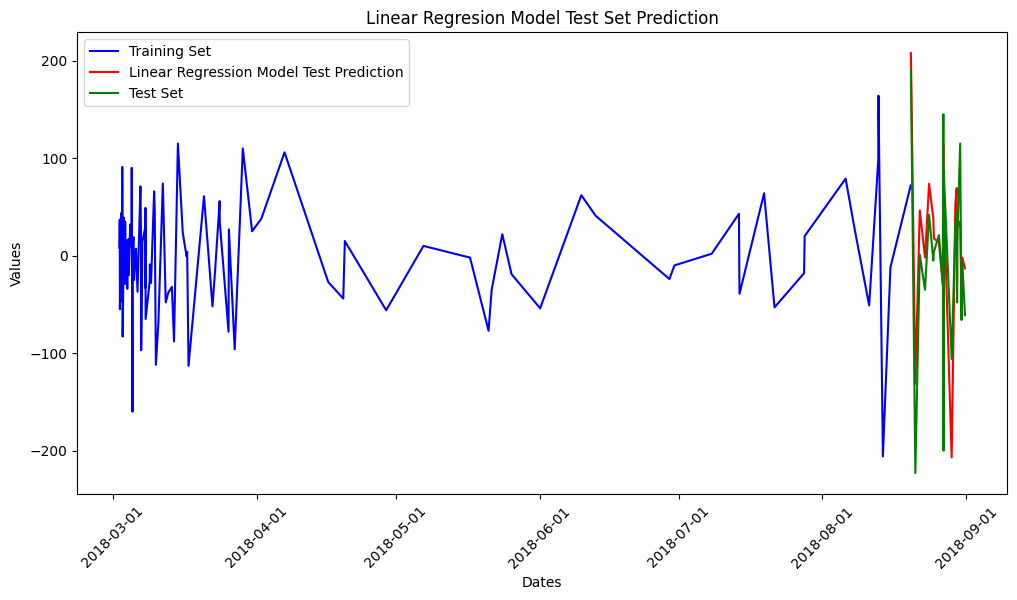

In [230]:
#Use matplotlib in order to create a chart displaying the predictions for the Linear Regression model.
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, color='blue', label='Training Set')
plt.plot(y_test.index, lr_test_predicted, color='red', label='Linear Regression Model Test Prediction')
plt.plot(y_test.index, y_test, color='green', label='Test Set')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
plt.title('Linear Regresion Model Test Set Prediction')
plt.xlabel('Dates')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.show() 

#### Final Conclusion

Out of all the models, the Linear Regression Model had the best RMSE 45.97, which was lower than the project's
requirement's RMSE of 48.  The fact that the Linear Regression model had the best training set prediction could likely be due to the fact that there may be a strong linear trend in the dataset.  There were also no other numerical or categorical features from the original dataset (prior to feature engineering which relied soley on the num_orders column) that could've helped the mutlivariate and time series models make better predictions.

Models Ranked By RMSE (Test Set Prediction):
1) Linear Regression Model Test Set RMSE: 45.97 
   Linear Regression Model Test Set RMSE Percentage: 32.94 % 

2) Light GBM Model Test Set RMSE: 67.55
   Light GBM Regressor Model Test Set RMSE Error Percentage: 48.40 % 

3) Random Forest Regressor Model Test Set RMSE: 71.12
   Random Forest Regressor Model Test Set RMSE Error Percentage: 51.97 % 
   
4) Moving Average (MA) Model RMSE: 93.57 %
   Moving Average (MA) Model RMSE Error Percentage: 67.04 %

5) AutoRegression (AR) Model RMSE: 95.24
   AutoRegression (AR) Model RMSE Error Percentage: 68.24 %

6) SARIMAX Model RMSE: 98.02
   SARIMAX Model RMSE Error Percentage: 70.23% 
 
7) ARMA Model RMSE: 98.03
   ARMA Model RMSE Error Percentage: 70.24 % 


Observations:
* The data was originally nonstationary and needed differencing to be performed on the data in order 
to make it stationary.

* There is some seasonality noted in the data.

* There is an overall positive trend noted in the data (number of orders).

* There is some randomoness noted in the residual data, which is normally a positive result.

* The Linear Regression, Light GBM, and Random Forest Regression models had a better RMSE than the constant model's baseline RMSE,
which was 94.70.  THe Autoregression(AR), ARMA and SARIMAX models did not have a better RMSE than the constant model's baseline
RMSE. 

* The time series models(Autoregression, ARMA and SARIMAX) did not perform better than the other models, possibly because these
models only mainly take into account the target data when training.


* The SARIMAX model's poor prediction performance may be due to the fact that the dataset originally only comprised of the num_orders and the date columns.  The SARIMAX model had no exogenous features from the original dataset available in order to increase the model's prediction performance.